In [303]:
import pandas as pd
import matplotlib.pyplot as plt

In [304]:
df = pd.read_csv("train.csv")

In [305]:
def set_index(df):
    df=df.rename(columns={"Unnamed: 0": "index"})
    df = df.set_index("index")
    return df
df=set_index(df)


In [306]:
def del_targetName_col(df):
    del df["targetName"]
    return df
df=del_targetName_col(df)
df

,Time_0,posX_0,posY_0,posZ_0,velX_0,velY_0,velZ_0,Time_1,posX_1,posY_1,...,velY_28,velZ_28,Time_29,posX_29,posY_29,posZ_29,velX_29,velY_29,velZ_29,class
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,476.575673,486.926974,3.057090,305.119216,0.5,241.974495,-3.247714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,0,0,0,8073.292719,561.240579,0.939582,16.840572,0.5,284.446308,1.729876,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
2,0,0,0,7804.597004,438.284572,-0.340086,-13.597957,0.5,217.255563,-2.342927,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
3,0,0,0,18373.333536,425.454268,-3.073235,75.937858,0.5,209.276126,0.049345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
4,0,0,0,98.521291,240.365164,2.128843,203.312840,0.5,157.357468,-4.928751,...,-1.793284,421.374077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28741,0,0,0,10467.904201,557.116717,5.274202,103.343329,0.5,274.027446,0.311865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
28742,0,0,0,21234.059045,456.398272,-1.218920,470.479750,0.5,228.194794,-3.234799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
28743,0,0,0,1421.529354,334.224149,2.211883,250.205035,0.5,168.601951,1.728703,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [307]:
def group_by():
    return df["class"].value_counts()
group_by()

3     1873
1     1607
8     1603
7     1603
2     1583
5     1570
6     1460
4     1360
13    1355
9     1312
10    1227
24    1005
14    1003
20     986
12     962
11     934
17     883
21     866
25     832
18     819
22     814
15     793
19     782
23     777
16     737
Name: class, dtype: int64

In [308]:
import math
def get_distance_to_each_row():
    data ={"class":[],"distance":[]}
    for index, row in df.iterrows():
        not_null = row[row.notnull()]
        distance = math.dist([not_null[1],not_null[2]], [not_null[-4],not_null[-3]])
        new_line = data["class"].append(not_null[-1])
        data["distance"].append(distance)
    dist_table = pd.DataFrame (data, columns = ['class','distance'])
    return dist_table
dist_table=get_distance_to_each_row()
dist_table



,class,distance
0,3.0,434.399404
1,14.0,504.390186
2,21.0,375.435251
3,14.0,415.923003
4,20.0,628.854909
...,...,...
28741,25.0,494.249115
28742,23.0,444.458931
28743,1.0,251.209642
28744,7.0,338.028105


array([[<AxesSubplot:title={'center':'1.0'}>,
        <AxesSubplot:title={'center':'2.0'}>,
        <AxesSubplot:title={'center':'3.0'}>,
        <AxesSubplot:title={'center':'4.0'}>,
        <AxesSubplot:title={'center':'5.0'}>],
       [<AxesSubplot:title={'center':'6.0'}>,
        <AxesSubplot:title={'center':'7.0'}>,
        <AxesSubplot:title={'center':'8.0'}>,
        <AxesSubplot:title={'center':'9.0'}>,
        <AxesSubplot:title={'center':'10.0'}>],
       [<AxesSubplot:title={'center':'11.0'}>,
        <AxesSubplot:title={'center':'12.0'}>,
        <AxesSubplot:title={'center':'13.0'}>,
        <AxesSubplot:title={'center':'14.0'}>,
        <AxesSubplot:title={'center':'15.0'}>],
       [<AxesSubplot:title={'center':'16.0'}>,
        <AxesSubplot:title={'center':'17.0'}>,
        <AxesSubplot:title={'center':'18.0'}>,
        <AxesSubplot:title={'center':'19.0'}>,
        <AxesSubplot:title={'center':'20.0'}>],
       [<AxesSubplot:title={'center':'21.0'}>,
        <AxesSubpl

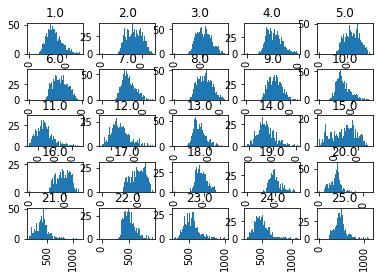

In [309]:
def show_th_histograms(dist_table):
    histograms = dist_table['distance'].hist(by=dist_table['class'],bins=100)
    return histograms
show_th_histograms(dist_table)

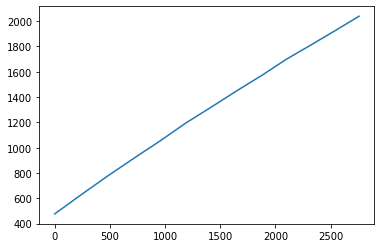

In [310]:
def drow_first_route():
    return plt.plot(df.iloc[0,1:-1:7], df.iloc[0,3::7])
drow_first_route()


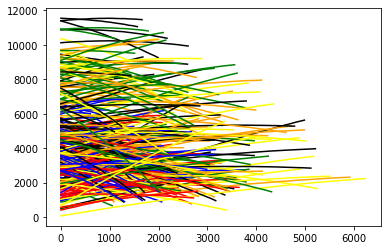

In [311]:
def drow_fifty_route_from_one_until_six():
    class1 = df[df["class"]==1]
    class2 = df[df["class"]==2]
    class3 = df[df["class"]==3]
    class4 = df[df["class"]==4]
    class5 = df[df["class"]==5]
    class6 = df[df["class"]==6]

    for i in range(50):
        plt.plot(class2.iloc[i,1:-1:7], class2.iloc[i,3::7],color="red")
        plt.plot(class1.iloc[i,1:-1:7], class1.iloc[i,3::7],color="blue")
        plt.plot(class3.iloc[i,1:-1:7], class3.iloc[i,3::7],color="green")
        plt.plot(class4.iloc[i,1:-1:7], class4.iloc[i,3::7],color="black")
        plt.plot(class5.iloc[i,1:-1:7], class5.iloc[i,3::7],color="orange")
        plt.plot(class6.iloc[i,1:-1:7], class6.iloc[i,3::7],color="yellow")
    

drow_fifty_route_from_one_until_six()


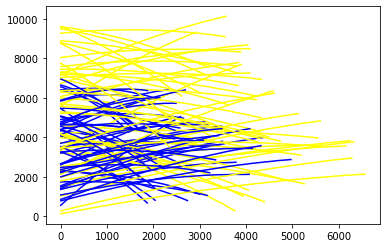

In [312]:
def drow_fifty_route_from_one_and_six_in_fifteen_seconds():
    class1 = df[((df["class"]==1) & (df["posX_29"].notnull()))]
    class6 = df[((df["class"]==6) & (df["posX_29"].notnull()))]
    for i in range(50):
        plt.plot(class1.iloc[i,1:-1:7], class1.iloc[i,3::7],color="blue")
        plt.plot(class6.iloc[i,1:-1:7], class6.iloc[i,3::7],color="yellow")
drow_fifty_route_from_one_and_six_in_fifteen_seconds()

In [313]:
def get_fifty_route_from_one_and_six_in_fifteen_seconds_in_rockets_that_both_go_up_and_down():
    vel_z = df.iloc[:,6::7]
    is_negitive = [vel_z < 0]
    is_positive = [vel_z >0]
    result = []
    for index, row in is_negitive[0].iterrows():
        result.append(pd.Series(row).any() & pd.Series(is_positive[0].iloc[index]).any())
    vel_z = df[result]
    return vel_z

vel_z=get_fifty_route_from_one_and_six_in_fifteen_seconds_in_rockets_that_both_go_up_and_down()
vel_z

,Time_0,posX_0,posY_0,posZ_0,velX_0,velY_0,velZ_0,Time_1,posX_1,posY_1,...,velY_28,velZ_28,Time_29,posX_29,posY_29,posZ_29,velX_29,velY_29,velZ_29,class
index,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,8073.292719,561.240579,0.939582,16.840572,0.5,284.446308,1.729876,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
3,0,0,0,18373.333536,425.454268,-3.073235,75.937858,0.5,209.276126,0.049345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
11,0,0,0,29144.669577,458.863187,2.145750,31.216065,0.5,228.622125,-5.724700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
27,0,0,0,7200.477995,304.848931,-3.384408,9.790941,0.5,153.857889,2.048032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
31,0,0,0,9234.906065,441.524721,0.692295,82.358100,0.5,219.600708,-1.310860,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28722,0,0,0,8269.299469,279.414793,3.667112,10.688277,0.5,138.111755,1.609045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
28725,0,0,0,7715.067390,282.161834,4.582337,19.803800,0.5,137.087605,0.102473,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
28726,0,0,0,8034.842389,280.606734,-2.306307,13.296844,0.5,140.988678,2.767728,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


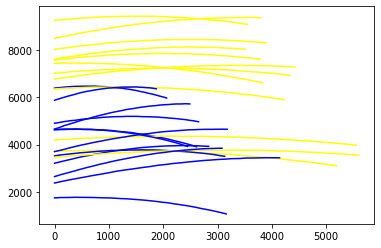

In [314]:
def drow_fifty_route_from_one_and_six_in_fifteen_seconds_in_rockets_that_both_go_up_and_down():
    class1 = vel_z[((vel_z["class"]==1) & (vel_z["posX_29"].notnull()))]
    class6 = vel_z[((vel_z["class"]==6) & (vel_z["posX_29"].notnull()))]
    for i in range(min(len(class1),len(class6))):
        plt.plot(class1.iloc[i,1:-1:7], class1.iloc[i,3::7],color="blue")
        plt.plot(class6.iloc[i,1:-1:7], class6.iloc[i,3::7],color="yellow")
drow_fifty_route_from_one_and_six_in_fifteen_seconds_in_rockets_that_both_go_up_and_down()

In [315]:
def get_rockets_form_one_and_six_classes(class1,class2):
     return df[(df["class"]==class1) | (df["class"]==class2)]
     
new_table=get_rockets_form_one_and_six_classes(1,16)
new_table

,Time_0,posX_0,posY_0,posZ_0,velX_0,velY_0,velZ_0,Time_1,posX_1,posY_1,...,velY_28,velZ_28,Time_29,posX_29,posY_29,posZ_29,velX_29,velY_29,velZ_29,class
index,,,,,,,,,,,,,,,,,,,,,
8,0,0,0,22755.007745,322.907548,-2.116101,-49.276934,0.5,159.962582,-1.544830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
10,0,0,0,2298.324202,208.753893,-0.530829,-86.436500,0.5,103.300349,0.488148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23,0,0,0,4331.792730,200.224336,-0.575352,-55.001105,0.5,95.468279,5.549668,...,7.956822,-163.133901,14.5,2559.177295,-1.545339,2701.476555,151.736947,1.347424,-167.93228,1
25,0,0,0,19522.371845,415.141017,2.198695,66.639950,0.5,204.966687,3.427748,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
29,0,0,0,6720.548827,616.957263,-1.899356,135.887091,0.5,315.454904,1.673596,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28687,0,0,0,2191.752312,381.717613,-0.631060,652.750647,0.5,187.698510,2.799435,...,-1.064509,486.642649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
28693,0,0,0,5498.476964,186.240663,-1.138759,53.968622,0.5,89.057677,-5.272400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
28709,0,0,0,1329.483571,339.867299,1.011814,272.526714,0.5,171.756455,5.817927,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [316]:
import random
def get_division_into_a_training_set_and_a_test_set(new_table):
    random_arr = random.sample(range(0, len(new_table)), int(len(new_table)*0.2))
    random_arr.sort()
    check_table = new_table.iloc[random_arr]
    train_table = new_table.drop(new_table.index[random_arr])
    return check_table,train_table
check_table,train_table=get_division_into_a_training_set_and_a_test_set(new_table)
check_table.loc[:,["posZ_1","class"]]

,posZ_1,class
index,,
25,19551.665067,16
68,3440.417016,1
105,5700.479183,1
120,4072.961070,1
134,7668.145560,16
...,...,...
28484,5479.930650,1
28505,1461.145992,1
28526,3505.431480,1


In [317]:
def separate_classes(check_table):
    classes = check_table["class"]
    del check_table["class"]
    return check_table,classes
check_table,classes=separate_classes(check_table) 


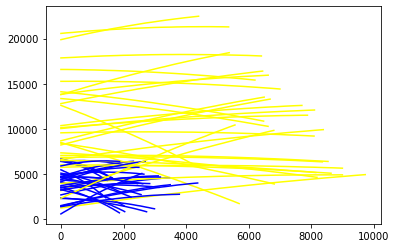

In [318]:
def drow_division_into_a_training_set_and_a_test_set(class1,class2):
    class1 = df[((df["class"]==class1) & (df["posX_29"].notnull()))]
    class6 = df[((df["class"]==class2) & (df["posX_29"].notnull()))]
    for i in range(30):
        plt.plot(class1.iloc[i,1:-1:7], class1.iloc[i,3::7],color="blue")
        plt.plot(class6.iloc[i,1:-1:7], class6.iloc[i,3::7],color="yellow")
drow_division_into_a_training_set_and_a_test_set(1,16)

In [319]:
def get_the_class_to_each_index(check_table):
    data ={"index":[],"class":[]}
    for index, row in check_table.iterrows():
        not_null = row[row.notnull()]
        if not_null[10]>8000 or not_null[20]>500 or not_null[-3]>350:
            type=16
        else:
            type=1
        new_line = data["index"].append(index)
        data["class"].append(type)
    classification_table = pd.DataFrame (data, columns = ['index','class'])
    return classification_table
classification_table=get_the_class_to_each_index(check_table)
classification_table


,index,class
0,25,16
1,68,1
2,105,1
3,120,1
4,134,16
...,...,...
463,28484,1
464,28505,1
465,28526,1
466,28740,1


In [320]:
def deciding_what_type_of_rocket_you_got(train_table):
    return train_table[(train_table["posX_29"].notnull())].iloc[:,[3,4,20,-4
                                                                                                                   ,-1]]

deciding_what_type_of_rocket_you_got(train_table)

,posZ_0,velX_0,velZ_2,velX_29,class
index,,,,,
23,4331.792730,200.224336,-61.031848,151.736947,1
459,6555.439504,115.492838,-102.707725,94.162026,1
525,20570.847304,373.799483,106.479023,367.145187,16
637,4064.352780,157.077482,-139.544086,124.244504,1
985,3147.528444,483.677019,532.496997,457.698126,16
...,...,...,...,...,...
26785,4769.984901,149.359301,-82.267376,122.721738,1
27206,3528.933549,182.783598,-48.891192,146.781139,1
27644,1890.730243,354.451725,159.124680,241.246654,1


In [321]:
from sklearn.metrics import confusion_matrix
def one_and_sixteen_confusion_matrix():
    y_true = classes
    y_pred = classification_table["class"]
    return confusion_matrix(y_true, y_pred)
the_confusion_matrix=one_and_sixteen_confusion_matrix()
the_confusion_matrix

array([[315,   0],
       [  5, 148]], dtype=int64)

In [322]:
def calculate_precision(the_confusion_matrix):
    precision_col_1=the_confusion_matrix[0][0]/(the_confusion_matrix[0][0]+the_confusion_matrix[1][0])
    precision_col_2=the_confusion_matrix[1][1]/(the_confusion_matrix[1][1]+the_confusion_matrix[0][1])
    return precision_col_1,precision_col_2

precision_col_1,precision_col_2=calculate_precision(the_confusion_matrix)
precision_col_1,precision_col_2

(0.984375, 1.0)

In [323]:
def calculate_recall(the_confusion_matrix):
    recall_col_1=the_confusion_matrix[0][0]/(the_confusion_matrix[0][0]+the_confusion_matrix[0][1])
    recall_col_2=the_confusion_matrix[1][1]/(the_confusion_matrix[1][1]+the_confusion_matrix[1][0])
    return recall_col_1,recall_col_2
recall_col_1,recall_col_2=calculate_precision(the_confusion_matrix)
recall_col_1,recall_col_2

(0.984375, 1.0)

In [324]:
def get_f1(recall_col,precision_col):
    return 2*((recall_col*precision_col)/(recall_col+precision_col))
f1_1=get_f1(recall_col_1,precision_col_1) 
f1_2=get_f1(recall_col_2,precision_col_2) 
(f1_1+f1_2)/2


0.9921875

In [325]:
def kinetic_energy(M, V):
    kinetic_energy = 0.5 * M * V * V
    return kinetic_energy


In [326]:
def potential_energy(M, H):
    potential_energy = M * 10*H
    return potential_energy

In [327]:
def get_energy(H,V):
    return kinetic_energy(1,V)+potential_energy(1,H)

In [328]:
import math
def get_energy_to_each_row():
    data ={"class":[],"energy":[]}
    for index, row in check_table.iterrows():
        not_null = row[row.notnull()]
        the_energy=[]
        for i in range(0,len(not_null)-4,7):
            v=math.sqrt(pow(not_null[i+4],2)+pow(not_null[i+5],2)+pow(not_null[i+6],2))
            the_energy.append(get_energy(not_null[i+3],v))
        new_line = data["class"].append(classes[index])
        data["energy"].append(the_energy)
    dist_table = pd.DataFrame (data, columns = ['class','energy'])
    return dist_table
energy_table=get_energy_to_each_row()
energy_table 

,class,energy
0,16,"[283617.6088771812, 282243.7759291721, 282826...."
1,1,"[55211.31117934478, 55510.670980500385, 54945...."
2,1,"[67768.94044622603, 67151.46001420799, 67738.7..."
3,1,"[61329.8303565126, 60982.58571913569, 60525.36..."
4,16,"[252669.94584294135, 253723.92032694822, 25231..."
...,...,...
463,1,"[66392.19792285204, 65728.04557617963, 66025.6..."
464,1,"[118530.94253857748, 111681.12602558295, 11113..."
465,1,"[70996.80054213174, 71380.4869907267, 69702.16..."
466,1,"[57224.62106777188, 56669.4668705527, 56239.60..."


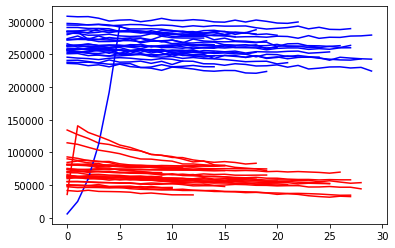

In [289]:
def drow_fifty_route_from_one_until_six(class1,class2):
    class1 = energy_table[energy_table["class"]==class1]["energy"]
    class16 = energy_table[energy_table ["class"]==class2]["energy"]


    for i in range(30):
        plt.plot(class1.iloc[i],color="red")
        plt.plot(class16.iloc[i],color="blue")
    
    

drow_fifty_route_from_one_until_six(1,16)


In [290]:
def get_the_class_to_each_index_1_16(energy_table):
    data ={"index":[],"class":[]}
    for index, row in energy_table[(energy_table["class"]==1) | (energy_table["class"]==16)].iterrows():
        if row.loc["energy"][-1]>150000:
            type=16
        else:
            type=1
        new_line = data["index"].append(index)
        data["class"].append(type)
    classification_table = pd.DataFrame (data, columns = ['index','class'])
    return classification_table
classification_table=get_the_class_to_each_index_1_16(energy_table)
classification_table


,index,class
0,0,1
1,1,1
2,2,1
3,3,1
4,4,16
...,...,...
463,463,16
464,464,1
465,465,1
466,466,1


In [291]:
from sklearn.metrics import confusion_matrix
def one_and_sixteen_confusion_matrix():
    y_true = classes
    y_pred = classification_table["class"]
    return confusion_matrix(y_true, y_pred)
the_confusion_matrix=one_and_sixteen_confusion_matrix()
the_confusion_matrix

array([[328,   0],
       [  0, 140]], dtype=int64)

In [292]:
def get_f1(recall_col,precision_col):
    return 2*((recall_col*precision_col)/(recall_col+precision_col))
f1_1=get_f1(recall_col_1,precision_col_1) 
f1_2=get_f1(recall_col_2,precision_col_2) 
f1_1

0.9939393939393939

In [293]:
f1_2

1.0

In [294]:
from sklearn.ensemble import RandomForestClassifier

check_table=check_table.fillna(0)
train_table=train_table.fillna(0)

X, y= train_table.iloc[:,:-1],train_table.iloc[:,-1]
clf = RandomForestClassifier(n_estimators=100).fit(X,y)
clf.predict(check_table)
clf.score(check_table,classes)

1.0

In [295]:
from sklearn.tree import DecisionTreeClassifier

X, y= train_table.iloc[:,:-1],train_table.iloc[:,-1]
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0).fit(X,y)
clf.predict(check_table)
clf.score(check_table,classes)

1.0

In [2]:
def get_the_class_to_each_index_3_9(check_table):
    data ={"index":[],"class":[]}
    i=0
    for index, row in check_table.iterrows():
        not_null = row[row.notnull()]
        if not_null[2]>1000 or not_null[-10]>6000  or energy_table[(energy_table["class"]==3) | (energy_table["class"]==9)].iloc[i]["energy"][0]>140000:
            type=9
        else:
            type=3
        new_line = data["index"].append(index)
        data["class"].append(type)
        i+=1
    classification_table = pd.DataFrame (data, columns = ['index','class'])
    
    return classification_table
classification_table=get_the_class_to_each_index_3_9(check_table)
the_confusion_matrix=one_and_sixteen_confusion_matrix()
the_confusion_matrix

In [ ]:
def get_the_class_to_each_index_5_12(energy_table):
    data ={"index":[],"class":[]}
    for index, row in energy_table[(energy_table["class"]==5) | (energy_table["class"]==12)].iterrows():
        pos_z = new_table.iloc[index][new_table.iloc[index].notnull()]["posZ_7"]
        if row.loc["energy"][-1]>140000  :
            type=12
        else:
            type=5
        new_line = data["index"].append(index)
        data["class"].append(type)
    classification_table = pd.DataFrame (data, columns = ['index','class'])
    return classification_table
classification_table=get_the_class_to_each_index_5_12(energy_table)
classification_table[classification_table["class"]==5]


In [ ]:
def get_rockets_form_four_classes():
     return df[(df["class"]==1) | (df["class"]==4) | (df["class"]==7) | (df["class"]==10)]
     
new_table=get_rockets_form_four_classes()


In [ ]:
import random
def get_division_into_a_training_set_and_a_test_set(new_table):
    random_arr = random.sample(range(0, len(new_table)), int(len(new_table)*0.2))
    random_arr.sort()
    check_table = new_table.iloc[random_arr]
    train_table = new_table.drop(new_table.index[random_arr])
    return check_table,train_table
check_table,train_table=get_division_into_a_training_set_and_a_test_set(new_table)

In [ ]:
def separate_classes(check_table):
    classes = check_table["class"]
    del check_table["class"]
    return check_table,classes
check_table,classes=separate_classes(check_table) 


In [300]:
from sklearn.ensemble import RandomForestClassifier

check_table=check_table.fillna(0)
train_table=train_table.fillna(0)

X, y= train_table.iloc[:,:-1],train_table.iloc[:,-1]
clf = RandomForestClassifier(n_estimators=10,max_depth=500).fit(X,y)
classification_table=clf.predict(check_table)
clf.score(check_table,classes)
clf.predict_proba(check_table)

0.9978632478632479

In [302]:
from sklearn.ensemble import RandomForestClassifier

check_table=check_table.fillna(0)
train_table=train_table.fillna(0)

X, y= train_table.iloc[:,:-1],train_table.iloc[:,-1]
clf = RandomForestClassifier(n_estimators=10,max_depth=500).fit(X,y)
classification_table=clf.predict(X)
clf.score(X,y)
clf.predict_proba(X)



1.0

In [ ]:
from sklearn.metrics import confusion_matrix
def four_confusion_matrix():
    y_true = classes
    y_pred = classification_table
    return confusion_matrix(y_true, y_pred)
the_confusion_matrix=four_confusion_matrix()
the_confusion_matrix

In [ ]:
def calculate_precision(the_confusion_matrix):
    precision = []
    for i in range(4):
        value=the_confusion_matrix[i][i]
        precision_col=0
        for j in range(4):
            precision_col+=the_confusion_matrix[j][i]
        precision.append((value/precision_col))
    return precision
precision=calculate_precision(the_confusion_matrix)
precision

In [ ]:
def calculate_recall(the_confusion_matrix):
    precision = []
    for i in range(4):
        value=the_confusion_matrix[i][i]
        precision_row=0
        for j in range(4):
            precision_col+=the_confusion_matrix[i][j]
        precision.append(value/precision_row)
    return precision
recall=calculate_precision(the_confusion_matrix)
recall

In [ ]:
def get_f1(recall_col,precision_col):
    return 2*((recall_col*precision_col)/(recall_col+precision_col))
f1 = 0
for i in range(4):
    f1+=get_f1(precision[i],recall[i]) 

f1/4

In [1]:
from sklearn.ensemble import RandomForestClassifier

check_table=check_table.fillna(0)
train_table=train_table.fillna(0)

X, y= train_table.iloc[:,:-1],train_table.iloc[:,-1]
clf = RandomForestClassifier(n_estimators=100,max_depth=100).fit(X,y)
classification_table=clf.predict(check_table)
clf.score(check_table,classes)
clf.predict_proba(check_table)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

check_table=check_table.fillna(0)
train_table=train_table.fillna(0)

X, y= train_table.iloc[:,:-1],train_table.iloc[:,-1]
clf = DecisionTreeClassifier(max_depth=3).fit(X,y)
tree.plot_tree(clf)
classification_table=clf.predict(check_table)
clf.score(check_table,classes)

In [ ]:
from sklearn.linear_model import LogisticRegression

check_table=check_table.fillna(0)
train_table=train_table.fillna(0)

X, y= train_table.iloc[:,:-1],train_table.iloc[:,-1]
clf = LogisticRegression(random_state=0,C=100).fit(X,y)
classification_table=clf.predict(X)
print(clf.predict_proba(X))
clf.score(X,y)